# Machine Learning Project

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score
plt.rcParams['font.family']='Malgun Gothic'
plt.rcParams['axes.unicode_minus']=False

In [31]:
dtc=DecisionTreeClassifier()
lgb=LGBMClassifier()
ss=StandardScaler()
mm=MinMaxScaler()
rs=RobustScaler()

## 1. scikit-learn에서 제공하는 iris dataset 가져오기

In [4]:
iris=load_iris()
data=iris.data
data=pd.DataFrame(data,columns=iris.feature_names)
sy=pd.Series(iris.target,dtype="category")
sy=sy.cat.rename_categories(iris.target_names)
data['species']=sy

### Train set, Test set split

In [7]:
features=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)']
target='species'
X_train,X_test,Y_train,Y_test=train_test_split(data[features],data[target],test_size=0.2,shuffle=True)

## 2. EDA

In [19]:
train=pd.concat([X_train,Y_train],axis=1)

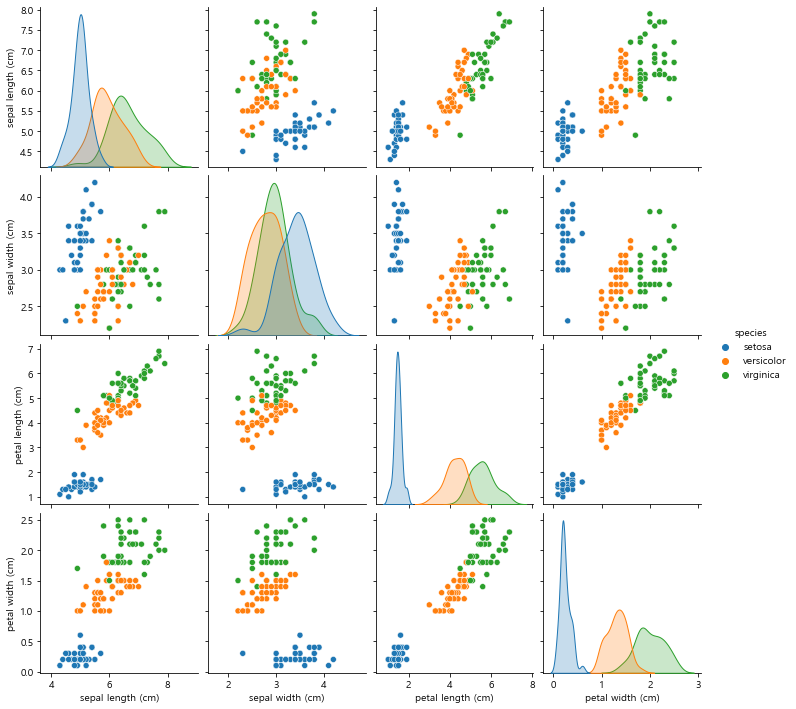

In [20]:
sns.pairplot(train,hue='species')

## 3. 전처리

In [21]:
X_train.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [22]:
Y_train.isna().sum()

0

In [23]:
X_test.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [24]:
Y_train.isna().sum()

0

## 4. 모델 선택 및 훈련

In [25]:
dtc.fit(X_train,Y_train)

DecisionTreeClassifier()

In [27]:
result=dtc.predict(X_test)

In [34]:
accuracy_score(Y_test,result)

0.9666666666666667

## 3.-1 LGB 모델 전처리

In [41]:
for i in range(0,len(X_train.columns)):    
    X_train[X_train.columns[i]]=rs.fit_transform(X_train[X_train.columns[i]].to_frame('{0}'.format(X_train[X_train.columns[i]])))

In [44]:
for i in range(0,len(X_test.columns)):    
    X_test[X_test.columns[i]]=rs.fit_transform(X_test[X_test.columns[i]].to_frame('{0}'.format(X_test[X_test.columns[i]])))

## 4.-1 LGB 모델 선택 및 훈련

In [47]:
lgb.fit(X_train,Y_train)

LGBMClassifier()

In [49]:
result2=lgb.predict(X_train)

In [50]:
accuracy_score(Y_train,result2)

1.0

## 4-2. StandardScaler

In [51]:
for i in range(0,len(X_train.columns)):    
    X_train[X_train.columns[i]]=ss.fit_transform(X_train[X_train.columns[i]].to_frame('{0}'.format(X_train[X_train.columns[i]])))
for i in range(0,len(X_test.columns)):    
    X_test[X_test.columns[i]]=ss.fit_transform(X_test[X_test.columns[i]].to_frame('{0}'.format(X_test[X_test.columns[i]])))

In [52]:
lgb.fit(X_train,Y_train)
result3=lgb.predict(X_train)
accuracy_score(Y_train,result3)

1.0

## minMAXScaler

In [53]:
for i in range(0,len(X_train.columns)):    
    X_train[X_train.columns[i]]=mm.fit_transform(X_train[X_train.columns[i]].to_frame('{0}'.format(X_train[X_train.columns[i]])))
for i in range(0,len(X_test.columns)):    
    X_test[X_test.columns[i]]=mm.fit_transform(X_test[X_test.columns[i]].to_frame('{0}'.format(X_test[X_test.columns[i]])))

In [54]:
lgb.fit(X_train,Y_train)
result4=lgb.predict(X_train)
accuracy_score(Y_train,result4)

1.0